## Chinook Analysis

The chinook database is representative of a digital media store.
In this project, we will be using sqlite to explore some areas of the store's operation and using matplotlib to visualize the results.
Finally, we will be making comments as to what these results mean and some recommendations as to what the company could do going forward.



This project was done under minimal guidance from the dataquest online program.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def run_query(q):
    with sqlite3.connect('chinook.sqlite') as conn:
        return pd.read_sql(q,conn)

In [3]:
def run_command(c):
    with sqlite3.connect(db) as conn:
        conn.isolation_level = None
        conn.execute(c)

In [4]:
# Showing tables in database
run_query("SELECT name, type FROM sqlite_master \
           WHERE type IN ('table','view')")

,name,type
0,Album,table
1,Artist,table
2,Customer,table
3,Employee,table
4,Genre,table
5,Invoice,table
6,InvoiceLine,table
7,MediaType,table
8,Playlist,table
9,PlaylistTrack,table


## Genre Analysis

In this section we will be looking into the number of sales per genre and ranking their perfomances.
In particular, this will allow us to see which genres we should spend more resources on developing new material.

In [14]:
track_by_genre = run_query("SELECT                                                                       \
               ta.genre Genre,                                                              \
               ta.tracks_sold Tracks_Sold,     \
               ROUND(Cast(ta.tracks_sold as FLOAT) / Cast((SELECT Count(*) From track) AS FLOAT), 3) Percentage \
          FROM                                                                          \
              (SELECT                                                            \
                     g.name genre,                                                              \
                     Count(t.trackId) tracks_sold \
               FROM genre g INNER JOIN track t \
               ON g.genreId = t.genreId     \
               GROUP BY g.name) ta \
          ORDER BY Tracks_Sold DESC")
tbg = track_by_genre.sort_values("Tracks_Sold",ascending=True)   
tbg = tbg[-5:]
track_by_genre

,Genre,Tracks_Sold,Percentage
0,Rock,1297,0.370
1,Latin,579,0.165
2,Metal,374,0.107
3,Alternative & Punk,332,0.095
4,Jazz,130,0.037
5,TV Shows,93,0.027
6,Blues,81,0.023
7,Classical,74,0.021
8,Drama,64,0.018
9,R&B/Soul,61,0.017


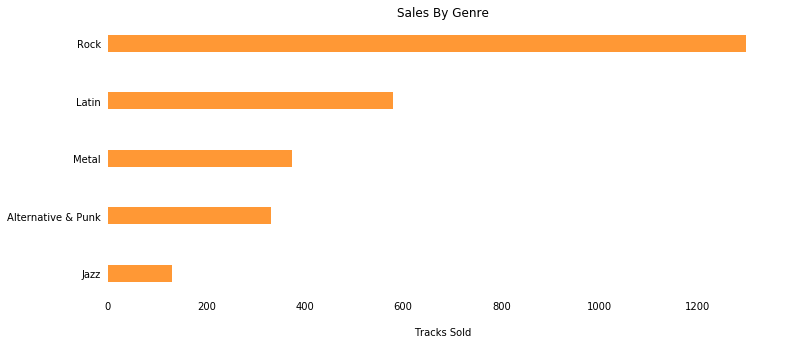

In [6]:
tracks = tbg["Tracks_Sold"]
y_pos = np.arange(len(tracks))
fig, ax = plt.subplots(figsize=(12,5))
ax.barh(y_pos, tracks,0.3, color = (1, 0.596, 0.208),align = 'center')
ax.tick_params(left = False, bottom = False)
for key, spine in ax.spines.items():
        spine.set_visible(False)
ax.set_yticklabels(tbg["Genre"])
ax.set_yticks(y_pos)
ax.set_xlabel("\nTracks Sold")
ax.set_title("Sales By Genre")
plt.show()

It therefore stands to reason that focusing our energies on Rock, Latin and Metal will be most useful based on their current profitablity. It is however possible that by widening our selection of Jazz and Punk that we may be able to reap greater track sales from those genres.

## Employee Analysis

In this section we will be taking a look at the sales team and assessing their individual performances.

In [7]:
run_query("PRAGMA table_info(employee)")

,cid,name,type,notnull,dflt_value,pk
0,0,EmployeeId,INTEGER,1,None,1
1,1,LastName,NVARCHAR(20),1,None,0
2,2,FirstName,NVARCHAR(20),1,None,0
3,3,Title,NVARCHAR(30),0,None,0
4,4,ReportsTo,INTEGER,0,None,0
5,5,BirthDate,DATETIME,0,None,0
6,6,HireDate,DATETIME,0,None,0
7,7,Address,NVARCHAR(70),0,None,0
8,8,City,NVARCHAR(40),0,None,0
9,9,State,NVARCHAR(40),0,None,0


In [9]:
run_query("SELECT * \
          FROM employee \
          Where title LIKE '%Sales%'")

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
1,3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
2,4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
3,5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [11]:
e_total = run_query("SELECT     \
                 te.Employee_Name Employee_Name, \
                 strftime('%m-%Y',te.hireDate) Hire_Date, \
                 SUM(te.total) Total     \
           FROM         \
               (SELECT \
                 e.employeeID e_id, \
                 e.hireDate, \
                 e.firstName || ' ' || e.lastName Employee_Name, \
                 c.customerID c_id, \
                 c.firstName || ' ' || c.lastName Customer_Name, \
                 SUM(i.total) total                               \
                 FROM employee e INNER JOIN customer c ON e.employeeId = c.supportRepId           \
                                 INNER JOIN invoice i ON c.customerId = i.customerId               \
                 GROUP BY c.customerId) te \
           GROUP BY te.e_id \
           ORDER BY Total DESC") 
e_total

,Employee_Name,Hire_Date,Total
0,Jane Peacock,04-2002,833.04
1,Margaret Park,05-2003,775.40
2,Steve Johnson,10-2003,720.16


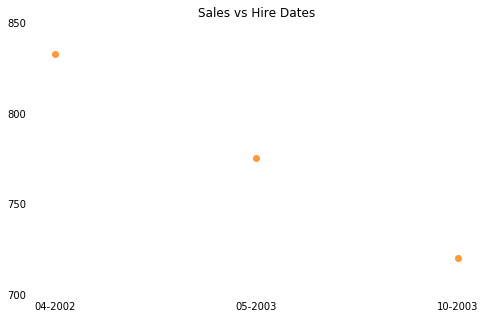

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(e_total["Hire_Date"],e_total["Total"], color = (1, 0.596, 0.208))
ax.tick_params(left = False, bottom = False)
for key, spine in ax.spines.items():
        spine.set_visible(False)
ax.set_title("Sales vs Hire Dates")
ax.set_yticks(np.arange(700,900,50))
#ax.set_xticklabels(e_total["Employee_Name"])



Even though there are only a few points in the data set, there seems to be a strong correlation between the start date and the sales per employee.